<a href="https://colab.research.google.com/github/roiei/ml_study/blob/master/GBDT_XGBClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# 피마 인디언 당뇨병 예측

768명의 인디언으로부터 8개의 속성과1 개의 클래스로 되어있는 csv 파일



### www.kaggle.com/kumargh/pimaindiansdiabetescsv?select=pima-indians-diabetes.csv

In [ ]:
# from https://www.kaggle.com/kumargh/pimaindiansdiabetescsv
diabetes_data = pd.read_csv('pima-indians-diabetes.csv')


In [ ]:
diabetes_data.columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thinkness', 'insulin', 'BMI', 'diabetespedigreefunction', 'age', 'Outcome']

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

In [ ]:
#임신횟수에 따른 당뇨병의 발병 예측
print(diabetes_data[['pregnancies','Outcome']].groupby(['pregnancies'],as_index=False).mean().sort_values(by='pregnancies',ascending=True))


    pregnancies   Outcome
0             0  0.342342
1             1  0.214815
2             2  0.184466
3             3  0.360000
4             4  0.338235
5             5  0.368421
6             6  0.306122
7             7  0.555556
8             8  0.578947
9             9  0.642857
10           10  0.416667
11           11  0.636364
12           12  0.444444
13           13  0.500000
14           14  1.000000
15           15  1.000000
16           17  1.000000


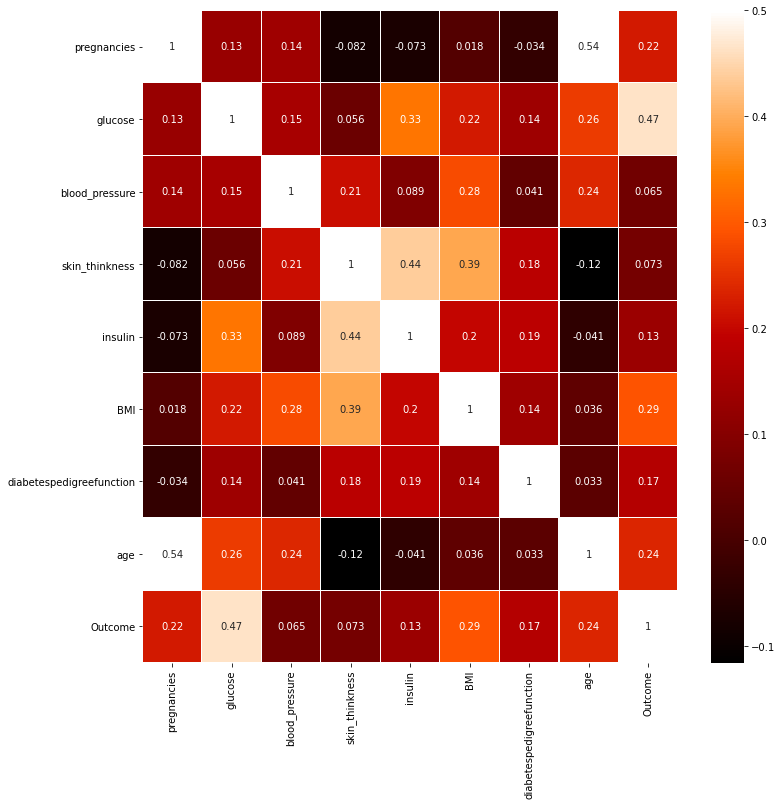

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 

#그래프의 크기 결정
plt.figure(figsize=(12,12))

#각 항목 간의 상관관계를 나타내주는 heatmap() 함수를 통해 그래프 표시 #두 항목을 짝지은 뒤 어떤 패턴으로 변화하는지 관찰하는 함수 다르면 0 같으면 1에 수렴
sns.heatmap(diabetes_data.corr(),linewidths=0.1,vmax=0.5,cmap=plt.cm.gist_heat,linecolor='white',annot=True)

#vmax 는 색상의 밝기를 조절하는 cmap 은 미리 정해진 matpliolib 색상의 설정값 불러오기
plt.show()


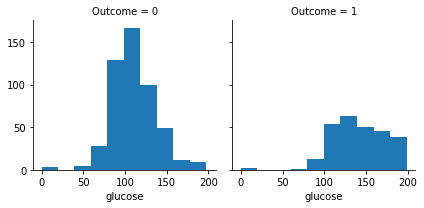

In [ ]:
grid = sns.FacetGrid(diabetes_data,col='Outcome')
grid.map(plt.hist,'glucose',bins=10)
plt.show()


In [ ]:
diabetes_data.head(3)

,pregnancies,glucose,blood_pressure,skin_thinkness,insulin,BMI,diabetespedigreefunction,age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0


# 평가지표 출력하는 함수 설정

In [ ]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

# Precision-Recall Curve Plot 그리기

In [ ]:
def precision_recall_curve_plot(y_test, pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # x축을 threshold, y축을 정밀도, 재현율로 그래프 그리기
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:thresholds_boundary], linestyle=':', label='recall')
    
    # threshold의 값 X축의 scale을 0.1 단위로 변경
    stard, end = plt.xlim()
    plt.xticks(np.round(np.arange(stard, end, 0.1), 2))
    
    plt.xlim()
    plt.xlabel('thresholds')
    plt.ylabel('precision & recall value')
    plt.legend()
    plt.grid()

# split train data

In [ ]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬:
 [[87 13]
 [23 31]]

정확도: 0.7662
정밀도: 0.7045
재현율: 0.5741
F1: 0.6327
AUC: 0.7220


# 임계값별로 정밀도-재현율 출력

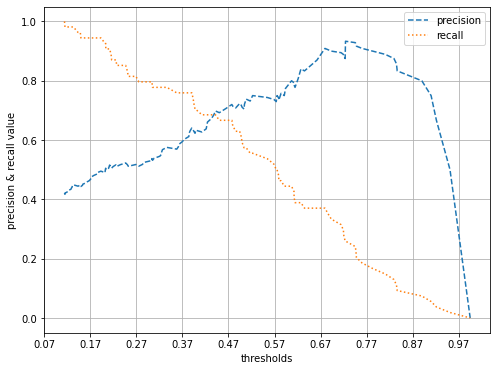

In [ ]:
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba)

# 데이터의 기초 통계값들

In [ ]:
diabetes_data.describe()

,pregnancies,glucose,blood_pressure,skin_thinkness,insulin,BMI,diabetespedigreefunction,age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
feature_list = ['glucose', 'blood_pressure', 'skin_thinkness', 'insulin', 'BMI']
def hist_plot(df):
    for col in feature_list:
        df[col].plot(kind='hist', bins=20).set_title('Histogram of '+col)
        plt.show()


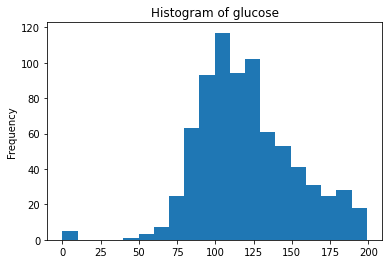

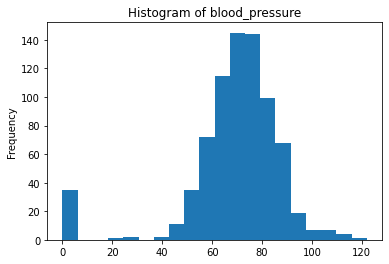

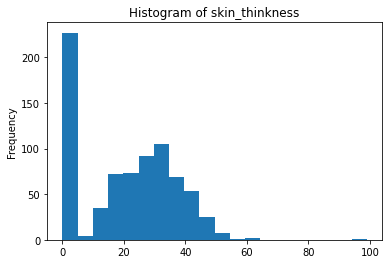

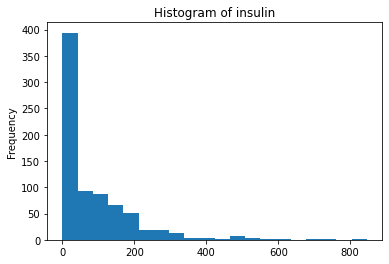

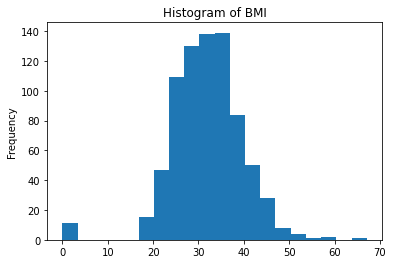

In [ ]:
hist_plot(diabetes_data)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import tensorflow as tf


# 위 컬럼들에 대한 0 값의 비율 확인

In [ ]:
zero_count = []
zero_percent = []
for col in feature_list:
    zero_num = diabetes_data[diabetes_data[col]==0].shape[0]
    zero_count.append(zero_num)
    zero_percent.append(np.round(zero_num/diabetes_data.shape[0]*100,2))


In [ ]:
zero = pd.DataFrame([zero_count, zero_percent], columns=feature_list, index=['count', 'percent']).T

In [ ]:
zero

,count,percent
glucose,5.0,0.65
blood_pressure,35.0,4.56
skin_thinkness,227.0,29.60
insulin,373.0,48.63
BMI,11.0,1.43


# 0 값들을 우선 NaN 값으로 대체

In [ ]:
diabetes_data[feature_list] = diabetes_data[feature_list].replace(0, np.nan)

# 위 5개 feature 에 대해 0값을 평균 값으로 대체

In [ ]:
mean_features = diabetes_data[feature_list].mean()
diabetes_data[feature_list] = diabetes_data[feature_list].replace(np.nan, mean_features)

# 데이터 세트에 대해 피처 스케일링을 적용하여 변환하기(로지스틱 회귀의 경우, 숫자 데이터에 스케일링을 적용하는 것이 일반적으로 성능이 좋음)

In [ ]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

In [ ]:
X

,pregnancies,glucose,blood_pressure,skin_thinkness,insulin,BMI,diabetespedigreefunction,age
0,1,85.0,66.0,29.000000,155.548223,26.6,0.351,31
1,8,183.0,64.0,29.142593,155.548223,23.3,0.672,32
2,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
3,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
4,5,116.0,74.0,29.142593,155.548223,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
763,2,122.0,70.0,27.000000,155.548223,36.8,0.340,27
764,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
765,1,126.0,60.0,29.142593,155.548223,30.1,0.349,47


In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: Outcome, Length: 767, dtype: int64

# StandardScaler 클래스를 상용하여 데이터 세트에 스케일링 적용

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=156, stratify = y)

# 로지스틱 회귀로 학습, 예측, 평가 수행

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,  y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬:
 [[89 11]
 [22 32]]

정확도: 0.7857
정밀도: 0.7442
재현율: 0.5926
F1: 0.6598
AUC: 0.7413


# 평가지표를 조사하기 위한 새로운 함수 생성

In [ ]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list 객체 내의 값을 iteration 하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [ ]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


임계값:  0.3
오차행렬:
 [[70 30]
 [12 42]]

정확도: 0.7273
정밀도: 0.5833
재현율: 0.7778
F1: 0.6667
AUC: 0.7389

임계값:  0.33
오차행렬:
 [[74 26]
 [14 40]]

정확도: 0.7403
정밀도: 0.6061
재현율: 0.7407
F1: 0.6667
AUC: 0.7404

임계값:  0.36
오차행렬:
 [[76 24]
 [15 39]]

정확도: 0.7468
정밀도: 0.6190
재현율: 0.7222
F1: 0.6667
AUC: 0.7411

임계값:  0.39
오차행렬:
 [[82 18]
 [15 39]]

정확도: 0.7857
정밀도: 0.6842
재현율: 0.7222
F1: 0.7027
AUC: 0.7711

임계값:  0.42
오차행렬:
 [[84 16]
 [15 39]]

정확도: 0.7987
정밀도: 0.7091
재현율: 0.7222
F1: 0.7156
AUC: 0.7811

임계값:  0.45
오차행렬:
 [[87 13]
 [20 34]]

정확도: 0.7857
정밀도: 0.7234
재현율: 0.6296
F1: 0.6733
AUC: 0.7498

임계값:  0.48
오차행렬:
 [[88 12]
 [21 33]]

정확도: 0.7857
정밀도: 0.7333
재현율: 0.6111
F1: 0.6667
AUC: 0.7456

임계값:  0.5
오차행렬:
 [[89 11]
 [22 32]]

정확도: 0.7857
정밀도: 0.7442
재현율: 0.5926
F1: 0.6598
AUC: 0.7413


In [ ]:
# 임계값을 0.48로 설정하여 예측 수행
binarizer = Binarizer(threshold=0.48)

In [ ]:
# 위에서 구한 predict_proba() 예측확률의 array에서 1에 해당하는 컬럼 값을 대입하여 Binarizer 반환하기
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

In [ ]:
get_clf_eval(y_test, pred_th_048)

오차행렬:
 [[88 12]
 [21 33]]

정확도: 0.7857
정밀도: 0.7333
재현율: 0.6111
F1: 0.6667
AUC: 0.7456


In [ ]:
#seed값 설정 (항상 같은 결과를 출력하기위해 (seed가 같으면 같은 결과 출력))

numpy.random.seed(3)
tf.random.set_seed(3)

X = diabetes_data[:,0:8]
Y = diabetes_data[:,8]

#set model
model = Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X,Y,epochs=200,batch_size=10)

print('Accuracy',model.evaluate(X,Y)[1])


TypeError: ignored

# XGB Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

In [ ]:
xgb_wrapper.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
w_preds = xgb_wrapper.predict(X_test)

In [ ]:
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test, w_preds)

오차행렬:
 [[82 18]
 [22 32]]

정확도: 0.7403
정밀도: 0.6400
재현율: 0.5926
F1: 0.6154
AUC: 0.7063


In [ ]:
for num_estimators in range(10):
  print('num estimators = ', num_estimators)
  xgb_wrapper = XGBClassifier(n_estimators=num_estimators, learning_rate=0.1, max_depth=3)
  xgb_wrapper.fit(X_train, y_train)
  w_preds = xgb_wrapper.predict(X_test)
  w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
  get_clf_eval(y_test, w_preds)

num estimators =  0
오차행렬:
 [[100   0]
 [ 54   0]]

정확도: 0.6494
정밀도: 0.0000
재현율: 0.0000
F1: 0.0000
AUC: 0.5000
num estimators =  1
오차행렬:
 [[86 14]
 [22 32]]

정확도: 0.7662
정밀도: 0.6957
재현율: 0.5926
F1: 0.6400
AUC: 0.7263
num estimators =  2
오차행렬:
 [[86 14]
 [22 32]]

정확도: 0.7662
정밀도: 0.6957
재현율: 0.5926
F1: 0.6400
AUC: 0.7263
num estimators =  3
오차행렬:
 [[86 14]
 [22 32]]

정확도: 0.7662
정밀도: 0.6957
재현율: 0.5926
F1: 0.6400
AUC: 0.7263
num estimators =  4
오차행렬:
 [[86 14]
 [22 32]]

정확도: 0.7662
정밀도: 0.6957
재현율: 0.5926
F1: 0.6400
AUC: 0.7263
num estimators =  5
오차행렬:
 [[86 14]
 [22 32]]

정확도: 0.7662
정밀도: 0.6957
재현율: 0.5926
F1: 0.6400
AUC: 0.7263
num estimators =  6
오차행렬:
 [[86 14]
 [22 32]]

정확도: 0.7662
정밀도: 0.6957
재현율: 0.5926
F1: 0.6400
AUC: 0.7263
num estimators =  7
오차행렬:
 [[86 14]
 [23 31]]

정확도: 0.7597
정밀도: 0.6889
재현율: 0.5741
F1: 0.6263
AUC: 0.7170
num estimators =  8
오차행렬:
 [[84 16]
 [21 33]]

정확도: 0.7597
정밀도: 0.6735
재현율: 0.6111
F1: 0.6408
AUC: 0.7256
num estimators =  9
오차행렬:
 [[85 15]
 [23 3

# complexity prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:

df = pd.DataFrame({
    'complexity': [67, 15,10,52,34,27,22,14,31,24, 47, 7, 17], 
    'doxygen': [72.8,55,100,100,74,80,84,97,65,70, 30, 100, 95],
    'instability': [0.75,0.8,0.25,0.74,0.54,0.42,0.33,0.27,0.30,0.28, 0.85,0.20,0.30],
    'modular_score': [0.44,0.85,0.94,0.32,0.47,0.74,0.80,0.98,0.65,0.72,0.22,0.94,0.88],
    'quality': [20,84,95,32,40,55,60,98,59,68,7,98,84]})

In [ ]:
df = pd.read_csv('complexity_test.csv')

In [ ]:
df.columns = ['complexity', 'doxygen', 'instability', 'modular_score', 'quality']

In [ ]:
df.head()


,complexity,doxygen,instability,modular_score,quality
0,15,55.0,0.80,0.85,84
1,10,100.0,0.25,0.94,95
2,52,100.0,0.74,0.32,32
3,34,74.0,0.54,0.47,40
4,27,80.0,0.42,0.74,55


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X


,complexity,doxygen,instability,modular_score
0,15,55.0,0.80,0.85
1,10,100.0,0.25,0.94
2,52,100.0,0.74,0.32
3,34,74.0,0.54,0.47
4,27,80.0,0.42,0.74
...,...,...,...,...
189,31,65.0,0.30,0.65
190,24,70.0,0.28,0.72
191,47,30.0,0.85,0.22
192,7,100.0,0.20,0.94


In [ ]:
y

0      84
1      95
2      32
3      40
4      55
       ..
189    59
190    68
191     7
192    98
193    84
Name: quality, Length: 194, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler, Binarizer

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-0.76984276, -1.17748519,  1.47156163,  0.66441658],
       [-1.06523338,  1.05756563, -0.9256235 ,  1.03754986],
       [ 1.4160478 ,  1.05756563,  1.21005053, -1.53292381],
       [ 0.35264158, -0.23379707,  0.33834684, -0.91103502],
       [-0.06090528,  0.06420971, -0.18467537,  0.2083648 ],
       [-0.3562959 ,  0.26288089, -0.57694203,  0.45712032],
       [-0.82892089,  0.90856224, -0.83845313,  1.20338687],
       [ 0.17540721, -0.68080723, -0.70769758, -0.16476847],
       [-0.23813965, -0.43246825, -0.79486795,  0.1254463 ],
       [ 1.12065719, -2.41918009,  1.68948755, -1.94751634],
       [-1.24246775,  1.05756563, -1.14354942,  1.03754986],
       [-0.65168652,  0.80922665, -0.70769758,  0.78879434],
       [ 2.30221965, -0.29339842,  1.25363571, -1.03541278],
       [-0.76984276, -1.17748519,  1.47156163,  0.66441658],
       [-1.06523338,  1.05756563, -0.9256235 ,  1.03754986],
       [ 1.4160478 ,  1.05756563,  1.21005053, -1.53292381],
       [ 0.35264158, -0.

In [ ]:
len(X)

194

In [ ]:
X


,complexity,doxygen,instability,modular_score
0,15,55.0,0.80,0.85
1,10,100.0,0.25,0.94
2,52,100.0,0.74,0.32
3,34,74.0,0.54,0.47
4,27,80.0,0.42,0.74
...,...,...,...,...
189,31,65.0,0.30,0.65
190,24,70.0,0.28,0.72
191,47,30.0,0.85,0.22
192,7,100.0,0.20,0.94


In [ ]:
len(y)

194

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=34)



# xgboost


In [ ]:
from sklearn.datasets import load_boston
import xgboost
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [ ]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [ ]:
xgb_model.fit(X_train, y_train)

[09:10:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

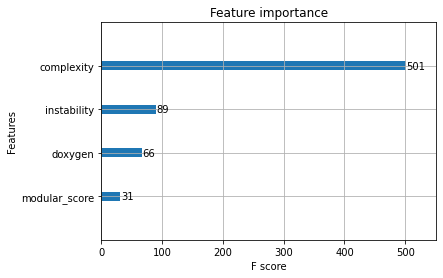

In [ ]:
xgboost.plot_importance(xgb_model)

In [ ]:
xgb_model.feature_importances_

array([0.7079052 , 0.19997104, 0.09051152, 0.00161226], dtype=float32)

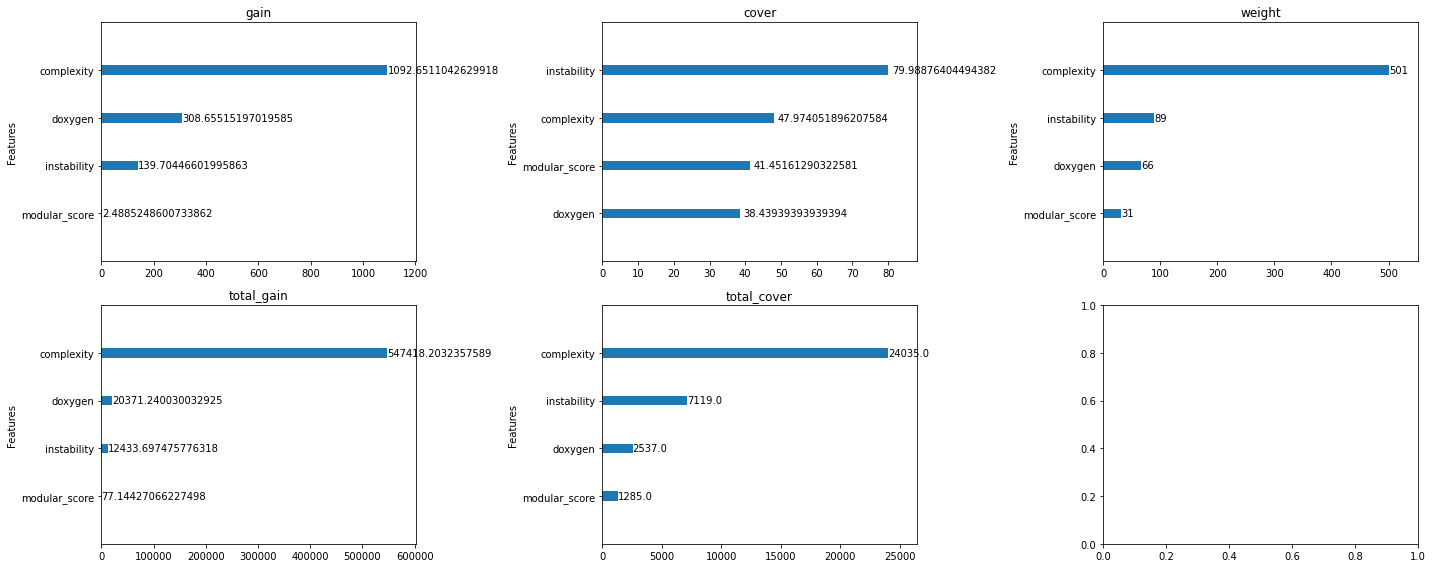

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,8))
axes = [ax for row_axes in axes for ax in row_axes]

for i, type in enumerate(['gain', 'cover', 'weight', 'total_gain', 'total_cover']):
  xgboost.plot_importance(xgb_model, importance_type=type, title=type, xlabel='', grid=False, ax=axes[i])

plt.tight_layout()
plt.show()

In [ ]:
xgb_model.

AttributeError: ignored

In [ ]:
predictions = xgb_model.predict(X_test)

In [ ]:
predictions

array([58.98365  , 67.96056  , 59.993534 , 19.994194 , 97.92856  ,
       19.994194 , 83.9599   , 39.98724  , 59.993534 , 54.974895 ,
       58.98365  , 31.99045  , 58.98365  , 83.9599   ,  6.9966693,
       54.974895 ,  6.9966693, 97.93545  , 83.9599   , 31.99045  ,
       54.974895 , 83.9599   , 39.98724  , 97.92856  , 67.96056  ,
        6.9966693, 19.994194 , 39.98724  , 97.92856  , 59.993534 ,
       97.92856  , 97.92856  , 94.98696  , 67.96056  , 83.9599   ,
       94.98696  , 83.976875 , 31.99045  , 94.98696  ], dtype=float32)

In [ ]:
predictions = xgb_model.predict(X_test, ntree_limit=50)

In [ ]:
predictions

array([57.98265 , 66.40147 , 59.328632, 19.656666, 95.28996 , 19.656666,
       82.37731 , 39.34766 , 59.328632, 54.070503, 57.98265 , 31.477081,
       57.98265 , 82.37731 ,  6.843997, 54.070503,  6.843997, 95.42642 ,
       82.37731 , 31.477081, 54.070503, 82.37731 , 39.34766 , 95.28996 ,
       66.40147 ,  6.843997, 19.656666, 39.34766 , 95.28996 , 59.328632,
       95.28996 , 95.28996 , 94.19446 , 66.40147 , 82.37731 , 94.19446 ,
       82.71249 , 31.477081, 94.19446 ], dtype=float32)

In [ ]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions,y_test))

0.9999986967518744
0.9999994079083193


# model save

In [ ]:
xgb_model.save_model("model.json")

In [ ]:
xgb_model.save_model("model.txt")

#load


In [ ]:
model2 = xgb.XGBRegressor()

In [ ]:
model2.load_model("model.json")

[09:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
resutl = model2.predict(X_test, ntree_limit=50)

In [ ]:
resutl

array([57.98265 , 66.40147 , 59.328632, 19.656666, 95.28996 , 19.656666,
       82.37731 , 39.34766 , 59.328632, 54.070503, 57.98265 , 31.477081,
       57.98265 , 82.37731 ,  6.843997, 54.070503,  6.843997, 95.42642 ,
       82.37731 , 31.477081, 54.070503, 82.37731 , 39.34766 , 95.28996 ,
       66.40147 ,  6.843997, 19.656666, 39.34766 , 95.28996 , 59.328632,
       95.28996 , 95.28996 , 94.19446 , 66.40147 , 82.37731 , 94.19446 ,
       82.71249 , 31.477081, 94.19446 ], dtype=float32)

# XGBClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

In [ ]:
xgb_wrapper.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
w_preds = xgb_wrapper.predict(X_test)

In [ ]:
w_preds

array([59, 68, 60, 20, 98, 20, 84, 40, 60, 55, 59, 32, 59, 84,  7, 55,  7,
       98, 84, 32, 55, 84, 40, 98, 68,  7, 20, 40, 98, 60, 98, 98, 95, 68,
       84, 95, 84, 32, 95])

In [ ]:
X_test[:5]

,complexity,doxygen,instability,modular_score
7,31,65.0,0.30,0.65
34,24,70.0,0.28,0.72
187,22,84.0,0.33,0.80
51,67,72.8,0.75,0.44
166,7,100.0,0.20,0.94


In [ ]:
w_preds

array([59, 68, 60, 20, 98, 20, 84, 40, 60, 55, 59, 32, 59, 84,  7, 55,  7,
       98, 84, 32, 55, 84, 40, 98, 68,  7, 20, 40, 98, 60, 98, 98, 95, 68,
       84, 95, 84, 32, 95])

In [ ]:
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
w_pred_proba

array([4.4500250e-03, 4.3878625e-03, 5.0187879e-03, 9.5810127e-01,
       8.7454991e-04, 9.5810127e-01, 1.8518582e-03, 4.9674041e-03,
       5.0187879e-03, 5.0456850e-03, 4.4500250e-03, 3.3853285e-03,
       4.4500250e-03, 1.8518582e-03, 1.9301957e-03, 5.0456850e-03,
       1.9301957e-03, 1.9053089e-03, 1.8518582e-03, 3.3853285e-03,
       5.0456850e-03, 1.8518582e-03, 4.9674041e-03, 8.7454991e-04,
       4.3878625e-03, 1.9301957e-03, 9.5810127e-01, 4.9674041e-03,
       8.7454991e-04, 5.0187879e-03, 8.7454991e-04, 8.7454991e-04,
       2.2024310e-03, 4.3878625e-03, 1.8518582e-03, 2.2024310e-03,
       2.1944486e-03, 3.3853285e-03, 2.2024310e-03], dtype=float32)

#evaluation

In [ ]:
from sklearn.metrics import explained_variance_score

In [ ]:
r_sq = xgb_wrapper.score(X_train, y_train)
print(r_sq)

# Explained variance regression score function.
# Best possible score is 1.0, lower values are worse.
print(explained_variance_score(w_preds, y_test))

1.0
1.0


#binary classification이 아니므로, 아래 confusion matrix를 통한 평가는 필요 없음

In [ ]:
get_clf_eval(y_test, w_preds)

ValueError: ignored

In [ ]:
confusion = confusion_matrix(y_test, w_preds)


In [ ]:
accuracy = accuracy_score(y_test, w_preds)


In [ ]:
precision = precision_score(y_test, w_preds, average=None)


In [ ]:
recall = recall_score(y_test, w_preds, average=None)


In [ ]:
F1 = f1_score(y_test, w_preds, average=None)


In [ ]:
AUC = roc_auc_score(y_test, w_preds, average='ovo')



ValueError: ignored

In [ ]:
print('오차행렬:\n', confusion)
print('\n정확도: {:.4f}'.format(accuracy))
print('정밀도: {}'.format(precision))
print('재현율: {}'.format(recall))
print('F1: {}'.format(F1))

오차행렬:
 [[0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]]

정확도: 0.0000
정밀도: [0. 0. 0. 0.]
재현율: [0. 0. 0. 0.]
F1: [0. 0. 0. 0.]
